# Examen parcial 4_2 ## Equaciones diferenciales 
# $\color{red}{\text{(10p max)}}$ - elige tus opciones 

* Antes de enviar el archivo, $\textbf{reiniciar y ejecutar el kernel}$ y ver que el archivo se compila sin errores
* enviar el archivo jupyter sin anexos antes de las 10.15am del 11.04.2022 a mi dirección de correo electrónico: michal.hemmerling@udea.edu.co 

Examen Parcial 4 David Alava 

CC:1006946708

## Ejercicio 1. $\color{red}{\text{(4p max)}}$ Ecuaciones diferenciales - problema de valor inicial (initial value problem).

La ley de Newton del enfriamiento tiene forma de ecuación diferencial

$$\frac{dy}{dt}=k(y-T_{amb}) $$


donde:
* y es la temperatura actual de un objeto
* t es tiempo
* k es un valor constante de enfriamiento
* $T_{amb}$ es la temperatura del ambiente

La pizza inicialmente a 20 grados se coloca en un horno precalentado (temperatura 300 grados). Mostrar la evolución temporal de la temperatura de la pizza.

a) usando `scipy.integrate.solve_ivp` resolver ecuación diferencial:

* para el rango t: t=[0:60], [minutos] (use 100 puntos)
* asumir k=-0.1

b) Hace grafico de $y(t)$ vs $t$ (con leyenda)
* después de qué tiempo la pizza tendrá más de 280 grados? (puede obtener índices usando `np.argwhere` para obtener un rango de temperatura más preciso)

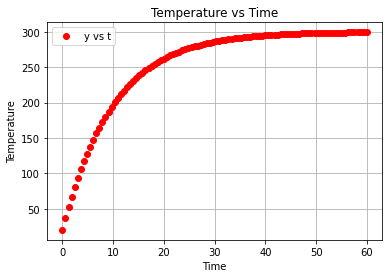

In [122]:
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
import numpy as np

def derivs(t,y):
   
    return -0.1*(y-300)

t_span=[0.0,60.0]
myt_eval=np.linspace(0.0,60.0,100) # opcional
y0=[20]
sol = solve_ivp(derivs, t_span, y0, method='RK45', t_eval=myt_eval)
plt.plot( sol.t,sol.y[0],'or', label='y vs t')
plt.xlabel('Time')
plt.ylabel('Temperature')  
plt.title('Temperature vs Time')
plt.grid()
plt.legend()     




In [123]:
#Parte b:
T=np.argwhere(sol.y[0]>280)
T[0][0]



44

In [124]:
#Parte b:
#Utilizando np.argwhere nos damos cuenta que la pizza supera los 280 grados luego de 44 minutos

## Ejercicio 2. $\color{red}{\text{(3p max)}}$ Equaciones diferenciales - problema de valor de limite (boundary value problem).

Los organizadores de un espectáculo de fuegos artificiales quieren que los fuegos exploten a 40 metros sobre el suelo 5 segundos después del lanzamiento. Encuentra la velocidad inicial del cohete. 

a) usar ecuacion diferencial segunda orden:

$$\frac{d^2y}{dt^2}= −g $$

donde $y$ es altitud de cohete y,   

b) hacer plot $y(t)$ vs $t$


In [125]:
import numpy as np
t_steps = 100
y0 = np.ones((2,t_steps))


In [126]:
from scipy.integrate import solve_bvp
import numpy as np

def derivs(t,y):
    dydt=np.zeros((y.shape))
    dydt[0]=y[1]
    dydt[1]=-9.81
    return dydt

def bc(ya,yb):
    residuals=np.array([0.0,0.0])
    residuals[0]=ya[0] - 0.0
    residuals[1]=yb[0] - 40.0
   
    return residuals

t_steps = 100
t = np.linspace(0,5,t_steps)

y0 = np.ones((2,t_steps))



sol = solve_bvp(derivs, bc, t, y0)
sol.y[1][0]


32.52499999999998

In [127]:
#La velocidad inicial es de aproximadamente 32.5 m/s

No handles with labels found to put in legend.


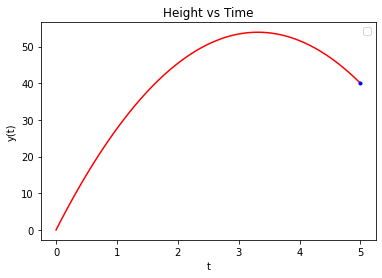

In [128]:
import matplotlib.pyplot as plt
fig, ax=plt.subplots(1,1)
ax.plot(sol.x, sol.y[0],'-r')
ax.plot(5,40,'.b')
ax.set_title('Height vs Time')
ax.set_xlabel('t')
ax.set_ylabel('y(t)')
ax.legend()




## Ejercicio 3. $\color{red}{\text{(8p max)}}$ Problema de valor de limite (boundary value problem)

a) solucionar ecuacion diferencial usando `scipy.integrate.solve_ivp`

$$ \frac{d^2y}{dx^2}= cos(x) - 9y$$

Condiciones de frontera:

* $y^{\prime}(0) = 5$
* $y (\pi) = −\frac{5}{3}$

b) hacer plot $y$ vs. $x$

## Ejercicio 4.  Ecuaciones diferenciales acopladas - problema de valor inicial usar `scipy.integrate.solve_ivp` $\color{red}{\text{(7p)}}$ o `scipy.integrate.odeint` $\color{red}{\text{(6p)}}$

Resolver sistema de ecuaciones difereciales usando `scipy.integrate.solve_ivp` $\color{red}{\text{(7p)}}$ o `scipy.integrate.odeint` $\color{red}{\text{(6p)}}$


$$
\begin{align*} 
\frac{dx}{dt}&=\sigma (y-x) \\
\frac{dy}{dt}&=x(\rho-z) -y \\
\frac{dz}{dt}&=xy-\beta z 
\end{align*} 
$$

con los parametros:

* $\sigma =10$
* $\rho=28$
* $\beta=8/3$

Las ecuaciones relacionan las propiedades de una capa de fluido bidimensional calentada uniformemente desde abajo y enfriada desde arriba. En particular, las ecuaciones describen la tasa de cambio de tres cantidades con respecto al tiempo: x es proporcional a la tasa de convección, y a la variación horizontal de la temperatura y z a la variación vertical de la temperatura.

* x: la velocidad de movimiento convectivo, es decir, qué tan rápido giran los rollos,
* y: la diferencia de temperatura entre las corrientes ascendente y descendente, y
* z: la distorsión (desde la linealidad) del perfil de temperatura vertical.


a) hacer plot $x$ vs $z$ para valores iniciales

* x(0)=1.0
* y(0)=1.0
* z(0)=1.0


b) Comparar dos curvas en mismo plot:
primera curva: $x$ vs $t$ para los condiciones iniciales :
* x(0)=1.0
* y(0)=1.0
* z(0)=1.0

segunda curva: $x$ vs $t$ para los condiciones iniciales :
* x(0)=1.0
* y(0)=1.0
* z(0)=1.0001



In [129]:
import numpy as np
from scipy.integrate import odeint, solve_ivp
import matplotlib.pyplot as plt

In [130]:
def Lorentz(t, y):
    dydx = np.array([0.0,
                     0.0,0.0])
    σ=10.0
    ρ=28.0
    β=8.0/3.0
    
    
    dydx[0] = σ*(y[1]-y[0]) 
    dydx[1] = y[0]*(ρ-y[2]) - y[1]
    dydx[2] = y[0]*y[1]- β*y[2]
    return dydx   

In [131]:
y0 = np.array([1.0,
               1.0,1.0])

t_span = (0.0, 50.0)
t = np.arange(0.0, 50.0, 0.01)

result_solve_ivp = solve_ivp(Lorentz, t_span, y0,
                             method='LSODA', t_eval=t)

No handles with labels found to put in legend.


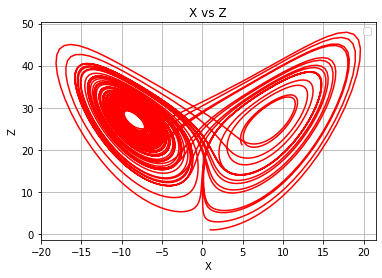

In [132]:
plt.plot( result_solve_ivp.y[0, :], result_solve_ivp.y[2, :], 'r', )
plt.xlabel('X')
plt.ylabel('Z')  
plt.title('X vs Z')
plt.grid()
plt.legend()     

In [133]:
y0 = np.array([1.0,
               1.0,1.0])
y0_2=np.array([1.0,
               1.0,1.0001,])

t_span = (0.0, 50.0)
t = np.arange(0.0, 50.0, 0.01)

result_solve_ivp_1 = solve_ivp(Lorentz, t_span, y0,
                             method='LSODA', t_eval=t)

result_solve_ivp_2=solve_ivp(Lorentz, t_span, y0_2,
                             method='LSODA', t_eval=t)


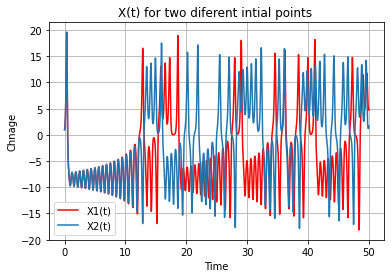

In [134]:
plt.plot( t, result_solve_ivp.y[0, :], 'r',label="X1(t)")
plt.plot(t, result_solve_ivp_2.y[0, :],label="X2(t)" )
plt.xlabel('Time')
plt.ylabel('Chnage')  
plt.title('X(t) for two diferent intial points ')
plt.grid()
plt.legend()     

# Feedback:
```
Exercise 1.
Solution + presentation of the results	            (max 4.0p):	4.0p

Exercise 2.
Solution + presentation of the results	            (max 3.0p):	3.0p

Exercise 3.
Solution + presentation of the results	            (max 8.0p):	0.0p

Exercise 4 ODEINT.
Solution + presentation of the results	            (max 6.0p):	0.0p

Exercise 4 IVP.
Solution + presentation of the results	            (max 7.0p):  7.0p


Muy buen trabajo!
- Total:                                              (max 10.0p):   10.0p (14)
```